# Assignment 3:  Histograms, Data Analysis and Fitting

The file "edmonton.pickle" contains the historical temperature data from Environment Canada, for weather stations that include "Edmonton" in their name( downloaded from climate.weather.gc.ca).  

The data are organized by "station"; a station object contains "name", "latitude", "longitude", "firstYear", "climateID", "stationID", "dates", "minT", "maxT","doy", and "year" and consist of the readings from a single station.

The important objects are "dates", which is an array of datetime objects, "minT", which is a corresponding array of minimum temperature for each date, "maxT" which is the array of maximum temperatures for those dates.  "doy" and "year" refer to "day of the year" (from 0-365) and the year (from 1880-2019).

The snippet of code below will allow you to read in the data.  You will need to download "edmonton.pickle", and "station.py" into your working directory.


In [1]:
import station  
import pickle
import datetime as dt

with open('edmonton.pickle','rb') as f:
    s=pickle.load(f)
    
#for stations in s:
    #print(stations.name)
    #print(stations.maxT)

Look at the data.  

1.  Make plots that show the max and min temperatures as a function of date for a single station


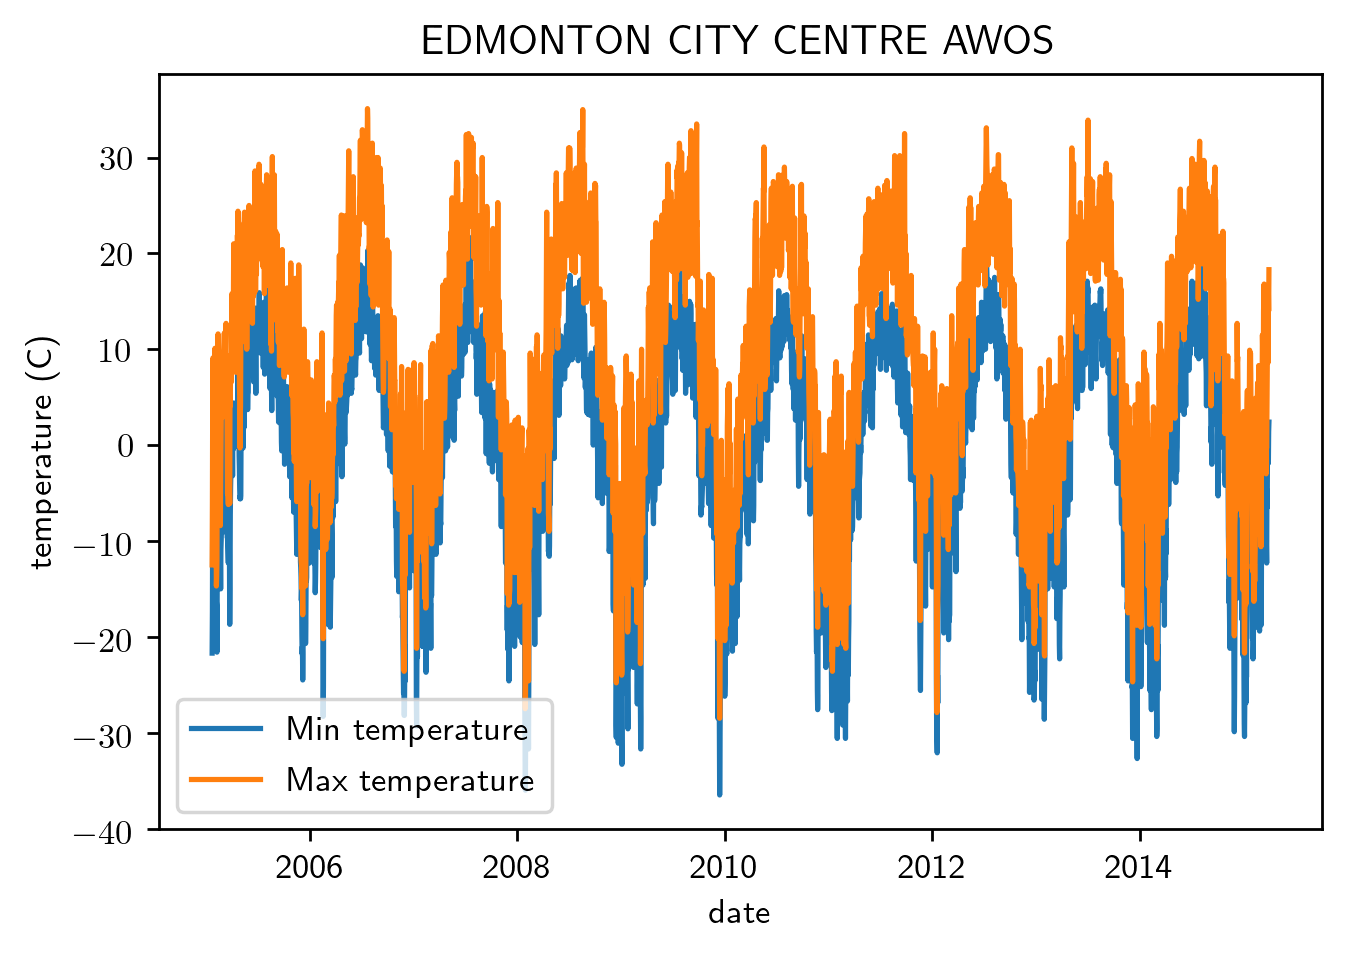

In [2]:
# Solution to Question 1.

import matplotlib as mpl
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)

import matplotlib.pyplot as plt
import numpy as np

def plot_min_max_temperature(station):
    plt.plot(station.dates,station.minT, label="Min temperature")
    plt.plot(station.dates,station.maxT, label='Max temperature')
    plt.title(station.name)
    plt.xlabel('date')
    plt.ylabel('temperature (C)')
    plt.legend()
    
plot_min_max_temperature(s[1])

2.  Histogram the max and min temperatures for a single station at a few dates throughout the year. Make sure the histograms have a reasonable number and range for the bins.  

In [3]:
# Solution to Question 2. 

import pandas as pd

def make_dataFrame(station, index=True):
    df = pd.DataFrame([])    
    df['minT_'+station.name] = pd.Series(station.minT)
    df['maxT_'+station.name] = pd.Series(station.maxT)
    df['dates_'+station.name] = pd.Series(station.dates, dtype='datetime64[ns]')
    if index:
        df = df.set_index('dates_'+station.name)
    return df

df = make_dataFrame(s[1])
df

,minT_EDMONTON CITY CENTRE AWOS,maxT_EDMONTON CITY CENTRE AWOS
dates_EDMONTON CITY CENTRE AWOS,,
2005-01-21,-21.7,-12.5
2005-01-22,-17.3,-6.1
2005-01-23,-6.6,4.4
2005-01-24,-1.6,9.1
2005-01-25,-7.3,6.3
...,...,...
2015-03-27,-0.9,15.7
2015-03-28,1.1,8.6
2015-03-29,-1.9,16.0


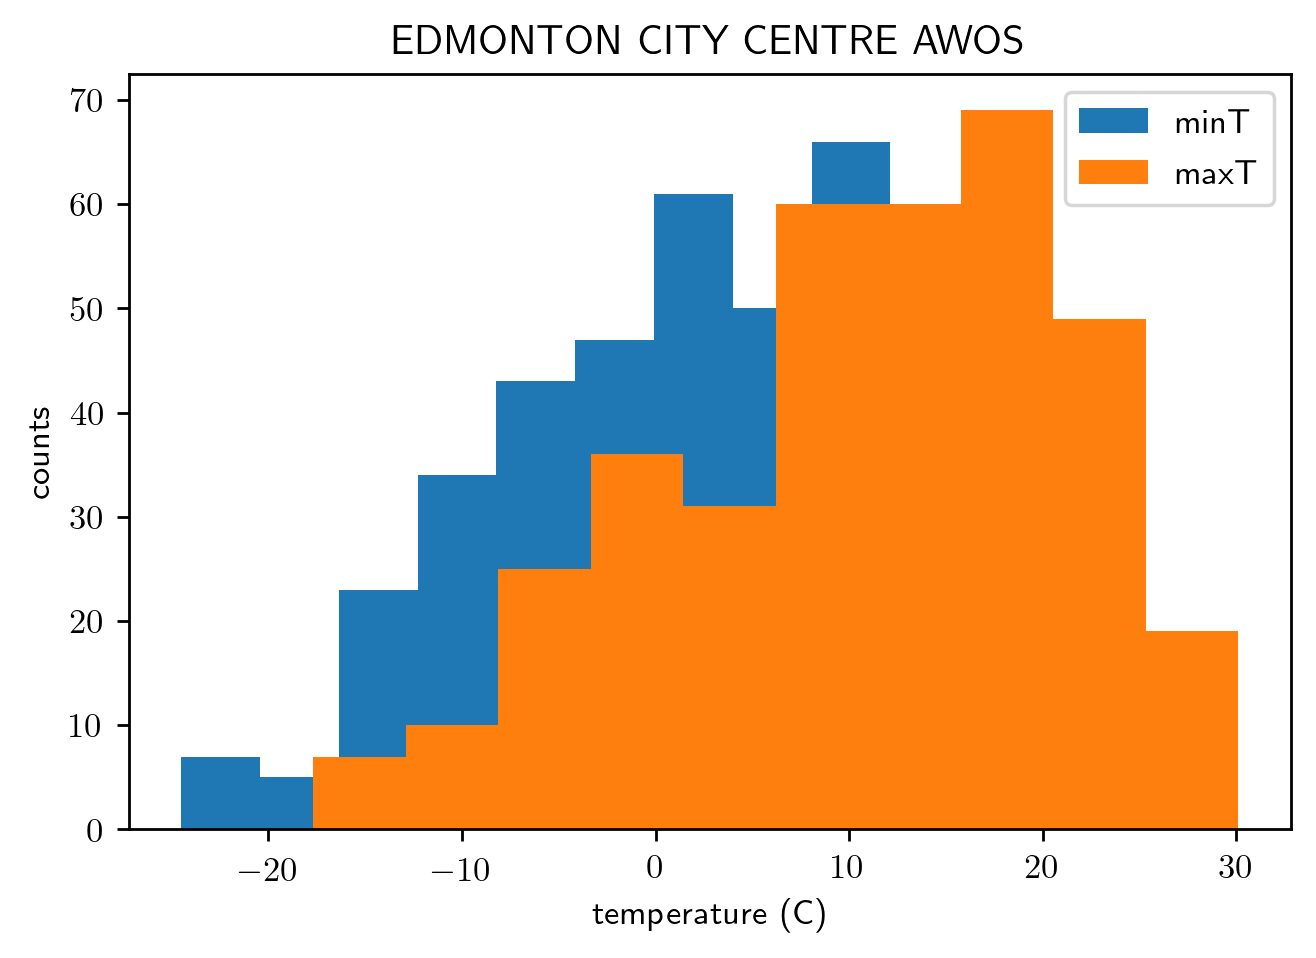

In [4]:
# Solution to Question 2 continued.

def plot_histogram(station):
    df = make_dataFrame(station)
    df_2005_2006 = df['2005-01-21':'2006-01-21']
    
    plt.title(station.name)
    plt.ylabel('counts')
    plt.xlabel('temperature (C)')
    plt.hist(df_2005_2006['minT_'+station.name],label='minT')
    plt.hist(df_2005_2006['maxT_'+station.name],label='maxT')
    plt.legend()
    
plot_histogram(s[1])

3.  For each pair of stations, find the periods of time during which they both measured temperatures.  If there is an overlapping period, find the mean and standard deviation of the differences between the max and min temperatures measured at the two stations for those periods.  Fill out a table with rows:  Name of Station 1, Name of Station 2, number of days that both measured temperatures, Average Difference in max, standard deviation of difference of Max, Average difference in min, standard deviation of difference in min

In [5]:
# Question 3. 

def station_compare(station1, station2, table=False, print_table=True):
    df_all = pd.concat([make_dataFrame(station1),make_dataFrame(station2)], axis=1)
    df_all = df_all.dropna()
    
    df_all['delta_minT'] = df_all['minT_'+station1.name] - df_all['minT_'+station2.name]
    df_all['delta_maxT'] = df_all['maxT_'+station1.name] - df_all['maxT_'+station2.name]
    
    if table==True:
        table = {'Name of Station 1': station1.name,
             'Name of Station 2': station2.name,
             'number of days that both measured temperatures': df_all.count().values,
             'Average Difference in max': df_all[['delta_maxT']].mean().values,
             'standard deviation of difference of Max': df_all[['delta_maxT']].std().values,
             'Average difference in min': df_all[['delta_minT']].mean().values,
             'standard deviation of difference in min': df_all[['delta_minT']].std().values,
        }
        if print_table:
            print(table)
        
        return df_all
    else:
        if print_table:
            print({'Station 1': station1.name,
                 'Station 2': station2.name})
            print(df_all[['delta_minT','delta_maxT']].describe())
        return df_all

df_all = station_compare(s[1], s[3])



{'Station 1': 'EDMONTON CITY CENTRE AWOS', 'Station 2': "EDMONTON INT'L A"}
        delta_minT   delta_maxT
count  2630.000000  2630.000000
mean      3.710076     0.626198
std       2.478676     1.270355
min      -7.700000    -9.000000
25%       1.800000    -0.100000
50%       3.800000     0.500000
75%       5.400000     1.100000
max      13.100000     8.200000


4.  For a few of the pairs which have significant differences, make a 2d color histogram of Ta-Tb versus Ta, where Ta and Tb refer to the measurements at the two stations. 

,minT_EDMONTON CITY CENTRE AWOS,maxT_EDMONTON CITY CENTRE AWOS,minT_EDMONTON INT'L A,maxT_EDMONTON INT'L A,delta_minT,delta_maxT
2005-01-21,-21.7,-12.5,-21.4,-12.9,-0.3,0.4
2005-01-22,-17.3,-6.1,-17.4,-5.3,0.1,-0.8
2005-01-23,-6.6,4.4,-8.2,4.6,1.6,-0.2
2005-01-24,-1.6,9.1,-3.0,7.6,1.4,1.5
2005-01-25,-7.3,6.3,-14.8,5.9,7.5,0.4
...,...,...,...,...,...,...
2012-04-07,-6.6,5.3,-8.7,9.1,2.1,-3.8
2012-04-08,-4.7,2.7,-7.5,5.8,2.8,-3.1
2012-04-09,-6.0,7.6,-10.1,8.4,4.1,-0.8
2012-04-10,-0.9,12.1,-3.4,13.1,2.5,-1.0


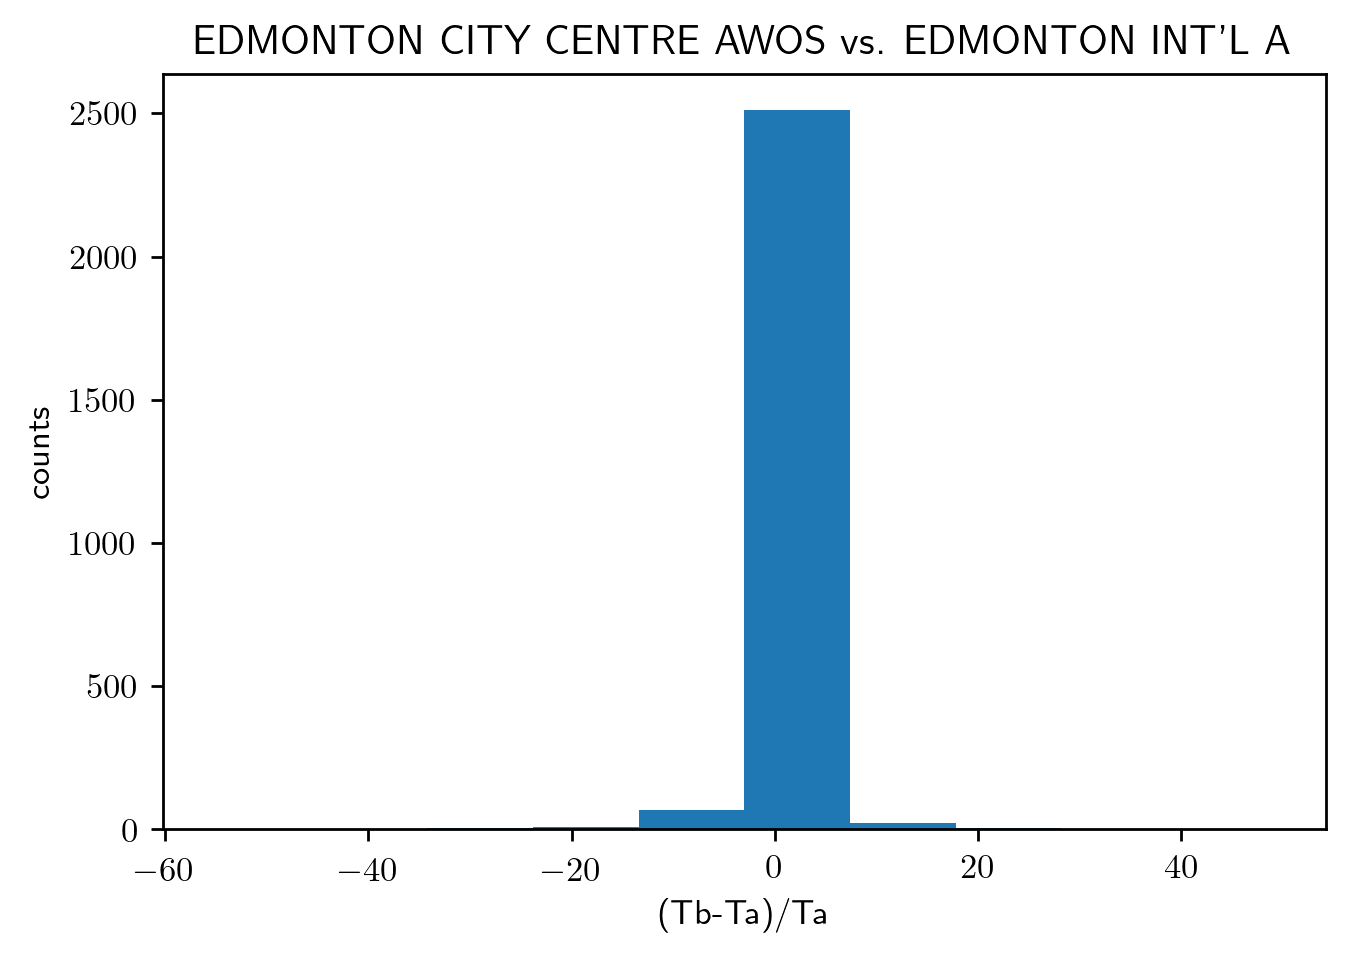

In [6]:
# Solution to Question 4.

def plot_histogram2(station1, station2):
    df_all = station_compare(station1,station2,table=False,print_table=False)
    
    Tb_Ta = df_all['delta_minT']/df_all['minT_'+station1.name]
    Tb_Ta = Tb_Ta.replace([np.inf, -np.inf], np.nan)
    Tb_Ta = Tb_Ta.dropna()
    
    plt.title(f'{station1.name} vs. {station2.name}')
    plt.ylabel('counts')
    plt.xlabel('(Tb-Ta)/Ta')
    plt.hist(Tb_Ta)
    
    
    return df_all

df_all = plot_histogram2(s[1], s[3])
df_all

5. Combine all the data from the different stations into an average max and min for each each day of the year. To do this, you will to pick one station as the standard, and correct each of the others by its average difference. Keep the data as an np.array. Plot averages for the year.

C:\Users\Zhi\Anaconda3\envs\phys420\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


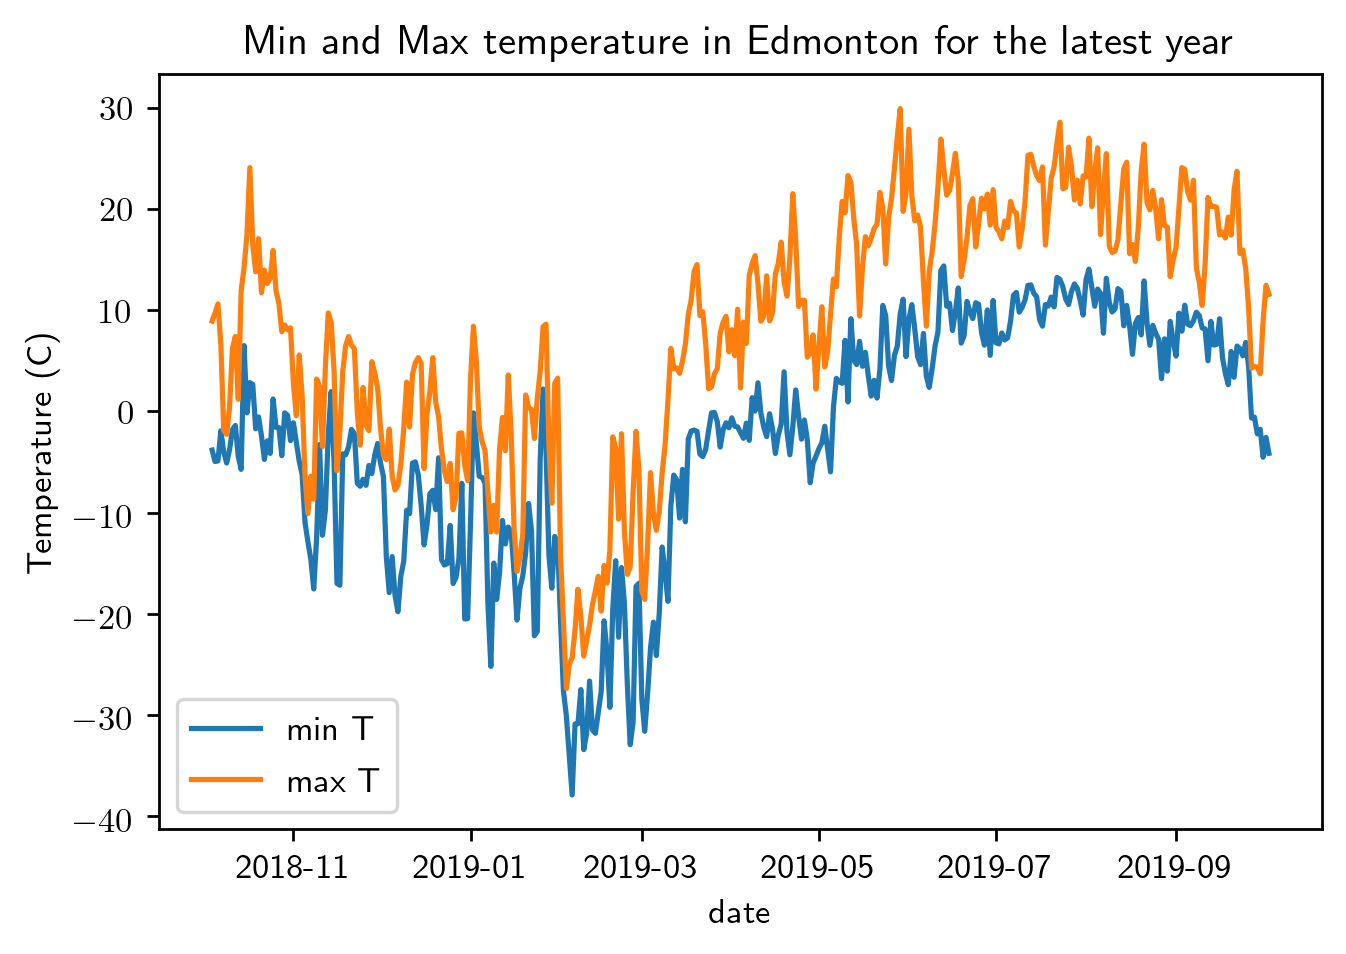

In [7]:
# Solution to Question 5.

dataframes_list = []
names_of_stations = [stations.name for stations in s]
for stations in s:
    dataframes_list.append(make_dataFrame(stations))
    
df_all_stations = pd.concat(dataframes_list, sort=False, axis=1)

minT_list = ['minT_'+i for i in names_of_stations]
maxT_list = ['maxT_'+i for i in names_of_stations]
df_all_stations['minT_mean'] = df_all_stations[minT_list].mean(axis=1)
df_all_stations['maxT_mean'] = df_all_stations[maxT_list].mean(axis=1)

df_all_stations[['minT_mean', 'maxT_mean']]
minT_mean = df_all_stations['minT_mean'].values
maxT_mean = df_all_stations['maxT_mean'].values
np.save('minT_mean', minT_mean)
np.save('maxT_mean', maxT_mean)

plt.title('Min and Max temperature in Edmonton for the latest year')
plt.ylabel('Temperature (C)')
plt.xlabel('date')
plt.plot(df_all_stations.index[-365:], minT_mean[-365:], label='min T')
plt.plot(df_all_stations.index[-365:], maxT_mean[-365:], label='max T')
plt.legend()

In [8]:
df_all_stations

,minT_EDMONTON,maxT_EDMONTON,minT_EDMONTON CITY CENTRE AWOS,maxT_EDMONTON CITY CENTRE AWOS,minT_EDMONTON CALDER,maxT_EDMONTON CALDER,minT_EDMONTON INT'L A,maxT_EDMONTON INT'L A,minT_EDMONTON INTERNATIONAL CS,maxT_EDMONTON INTERNATIONAL CS,...,minT_EDMONTON WOODBEND,maxT_EDMONTON WOODBEND,minT_FORT EDMONTON,maxT_FORT EDMONTON,minT_EDMONTON STONY PLAIN CS,maxT_EDMONTON STONY PLAIN CS,minT_EDMONTON TIEBEKE ESTATES,maxT_EDMONTON TIEBEKE ESTATES,minT_mean,maxT_mean
1880-07-11,12.2,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.200000,18.900000
1880-07-12,10.0,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,12.800000
1880-07-13,12.8,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.800000,16.700000
1880-07-14,12.8,23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.800000,23.300000
1880-07-15,9.4,26.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400000,26.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.8,5.1,...,NaN,NaN,NaN,NaN,-2.0,3.8,NaN,NaN,-2.222222,4.355556
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.9,3.4,...,NaN,NaN,NaN,NaN,-1.5,3.6,NaN,NaN,-1.766667,3.722222
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.8,9.1,...,NaN,NaN,NaN,NaN,-4.9,9.2,NaN,NaN,-4.522222,9.044444
2019-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.8,12.8,...,NaN,NaN,NaN,NaN,-2.4,12.8,NaN,NaN,-2.566667,12.455556


## No-atmosphere model of heating and cooling

The atmosphere plays a critical role in weather and climate, but modelling it is difficult.  Anyone who has watched the weather forecast sees weather systems move into and out of regions and winds/fronts/ high and low pressure regions- all atmospheric phenomena.  However, we are going to see whether we can fit the data with a "no-atmosphere" model.  If there were no atmosphere, the the only source of heat would be solar radiation, and the only cooling would be from black body radiation.  We incorporate this as an ordinary differential equation.  

\begin{equation} \frac {dT}{dt}=\alpha F(t) - \beta T^4 \end{equation}

Here $T$ is the (absolute!)temperature since $T^4$ is the Stefan-Boltzman law, $t$ the time, $F$ the solar flux (in Watts/m$^2$) and $\alpha$ and $\beta$ are the parameters of the model that we will allow to fit.  If we were to calculate from first principles, $\alpha$ would include the reflectivity of the surface and the clouds , as well as the heat capacity per square meter of the layer of the earth/atmosphere that heat up and cool down.  Similarly, $\beta$ includes the Stefan-Boltzman constant, the emissivity of the earth, and the heat capacity.  So this model is quite simple.

However, it is still interesting to see how well such a simple average model can work.  Since everything in the model is independent of time (except for the orbit) our model does not allow any differences year to year or any difference between locations at the same latitude.  

To start the problem, I have modified the earth-sun solution from Problem Set 2 to include the rotation of the earth, which is important to calculate the solar flux at Edmonton.    This involves adding the vector from the center of the earth to Edmonton, $\vec{x_{Ed}}$ and solving the differential equation 
\begin{equation} \frac{d\vec{x_{Ed}}}{dt}=\vec{\omega} \times \vec{x_{Ed}}\end{equation} where $\vec{\omega}$ in the constant rotation vector of the earth.  

We start by finding the "north pole vector", which we know is aligned with the earth-sun vector on June 21 and December 21st.  If we look at the Horizon web page for Dec 22, we see that X~0, Y=1 at the solstice, and that the axial tilt (obliquity) is 23.4392911 degrees.  Thus $$\hat{n}=(0,\sin(23.4392911),\cos(23.4392911))\approx(0,0.398,0.918)$$ and $$\vec{\omega}=\frac{2\pi\hat{n}}{24\times 3600 \times 365.2425/366.2425}$$
(Notice here the factor 365.2425/366.2425- which converts from normal days to "sidereal days"; which take into account the fact that the earths revolution around the sun means noon-noon is a little longer than one rotation).

We pick $\vec{x_{Ed}}=\cos(53.55)(1,0,0)+\sin(53.55)\hat{n}$ at the solstice. (Only the latitude matters- in principle we need to set longitude as well, but in our model the longitude doesn't really matter).


We run the code below to generate the inputs to the flux calcuation- the sun-earth vector and the Edmonton vector.  We pick t to cover the year, with say 48 bins per day.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import datetime as dt
import time

GM=132712440041.93938e9 #m^3/s^2
GMEarth=398600.435436e9 #m^3/s^2
MEarth=5.97219e24 #kg
MSun=GM/GMEarth*MEarth  #  this keeps the mass ratio right, with most precise GM values!
AU=149597870700.0 #m (exactly)
D=24*3600.0 #s

#  Factors from Horizon web site at 2458839.916666667 = A.D. 2019-Dec-22 10:00:00.0000 TDB 
#  This is picked to be at the hour closest to the solstice- notice that the x position of earth is very small
x0=np.array([4.858434307587728E-04 *AU, 9.836920738092132E-01 *AU, -4.745398623388847E-05 *AU])
v0=np.array([-1.749013293502635E-02 *AU/D,-5.128449611745279E-05 *AU/D,  4.120640971206839E-07 *AU/D])
tilt=23.4392911/180*np.pi
n=np.array([0, np.sin(tilt),np.cos(tilt)])  # vector of earth's axis
omega=2*np.pi/(D*365.2425/366.2425)*n  #rotation axis
latitude=53.55/180*np.pi  # latitude of the "Edmonton" weather station
radius=6.37e6  #Earth's radius=6370 km from Horizons
x_ed0=radius*(np.array([np.cos(latitude),0,0])+np.sin(latitude)*n)  #Edmonton location at solstice (at least for some year!)
factor=(MSun+MEarth)/MSun  # to convert xe to earth-sun distance
xsun=np.array([0,0,0]) 

solarConstant=1367.6 #W/m**2 from Horizons.  At 1 AU

cm=MEarth*x0/(MEarth+MSun)
x=x0-cm #  x is distance wrt to the cm

vcm=MEarth*v0/(MEarth+MSun)  #velocity of CM
v=v0-vcm


def dvdt(xvArgument,t):
    xv=xvArgument.reshape(3,3)
    xearth_sun=factor*xv[0] #position wrt sun
    distance=np.sqrt(np.dot(xearth_sun,xearth_sun))
    v_ed=np.cross(omega,xv[2])  # velocity of Edmonton is omega x x_ed
    return np.array([xv[1],-GM/distance**3*xearth_sun,v_ed]).reshape(9)

spy=365.2425*24*3600
t=np.linspace(0,380*24*3600,380*48)  # 48 bins per day, starting December 22.  Go 380 days to cover whole next year
y0=np.array([x,v,x_ed0]).reshape(9)

run=False
if run:
    cpuT0=time.process_time()
    ephemeris = odeint(dvdt, y0, t,rtol=1e-12)
    print("CPU Time=",time.process_time()-cpuT0)
    np.save('problem3',ephemeris)
else:
    ephemeris=np.load('problem3.npy')



Write a function to calculate the Flux at any instant of time, from the output of this calculation.  To do this you will need to interpolate ephemeris (since it is only returned at discrete times).  

Ephemeris contains three vectors- the position of the earth wrt to CM, the velocity of the earth wrt CM, and the position of Edmonton with respect to the center of the earth.  

Once we have the three vectors, the flux is
\begin{equation} F(t)=\begin{cases}\phi_0 \frac{\vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})}{|\vec{x_{Ed}}| |\vec {x_s}-\vec{x_e}|} & \text{if } \vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})>0\\0 & \text{if } \vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})<0
\end{cases} \end{equation}

Plot your function versus date (for one year)



Text(0.5, 1.0, 'Solar flux in Edmonton vs. time')

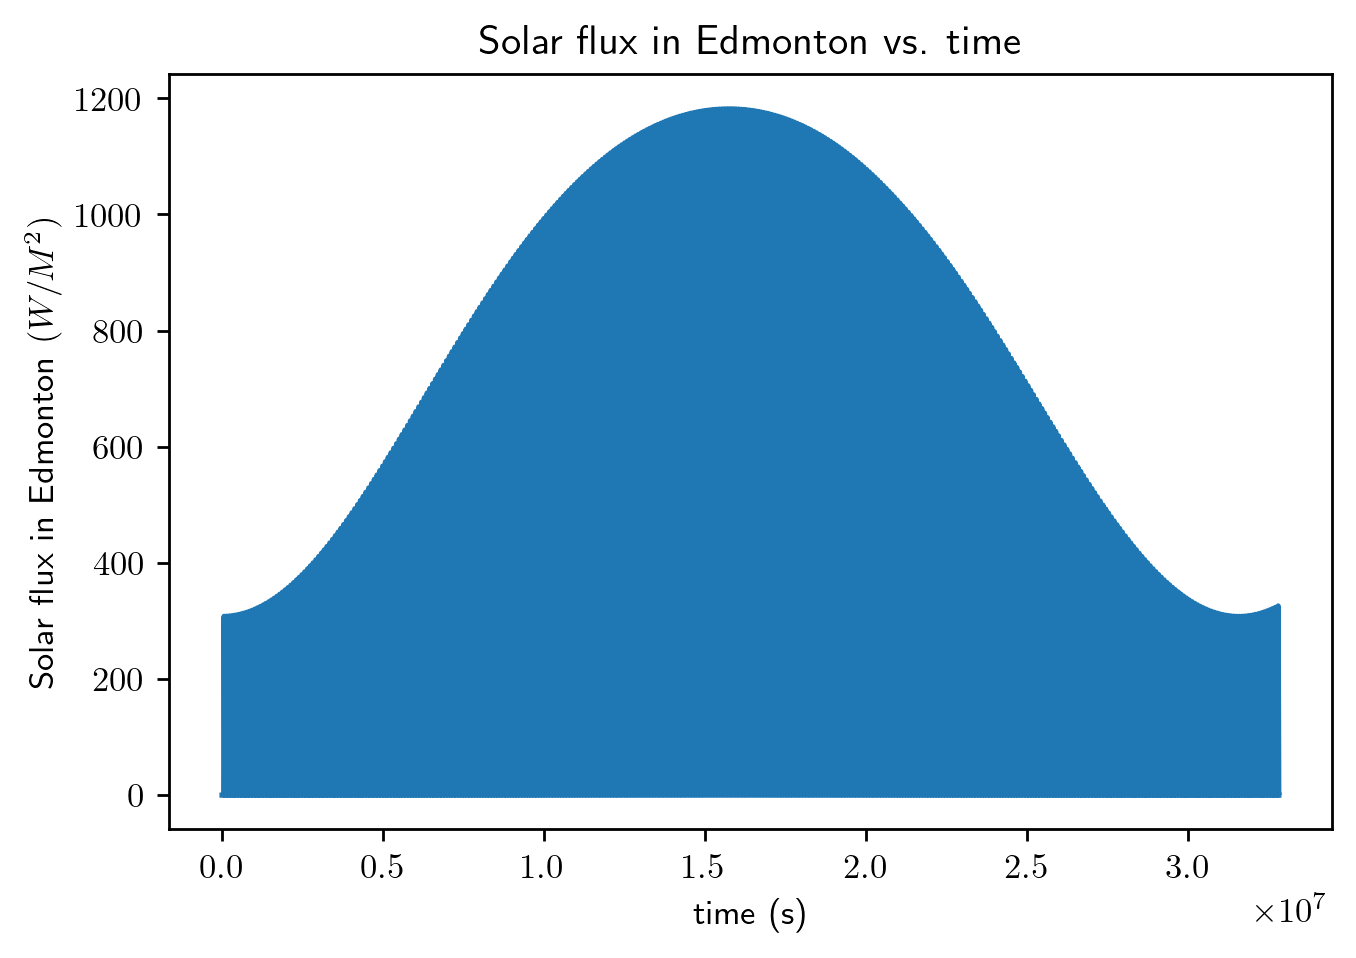

In [10]:
# Original plot

t = np.linspace(0,380*24*3600,380*48)

def flux(pos_earth_sun, pos_edmonton):    
    if np.dot(pos_earth_sun, pos_edmonton) > 0:
        return solarConstant*(np.dot(pos_earth_sun, pos_edmonton))/(np.linalg.norm(pos_earth_sun)*np.linalg.norm(pos_edmonton))
    else:
        return 0
    
flux_vals = []
for i,time in enumerate(t):
    pos_earth_sun = -ephemeris[i, 0:3]
    pos_edmonton = ephemeris[i, 6:9]
    flux_vals.append(flux(pos_earth_sun, pos_edmonton))

plt.plot(t, np.array(flux_vals))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Solar flux in Edmonton vs. time')

Text(0.5, 1.0, 'Interpolated solar flux in Edmonton for 1 year')

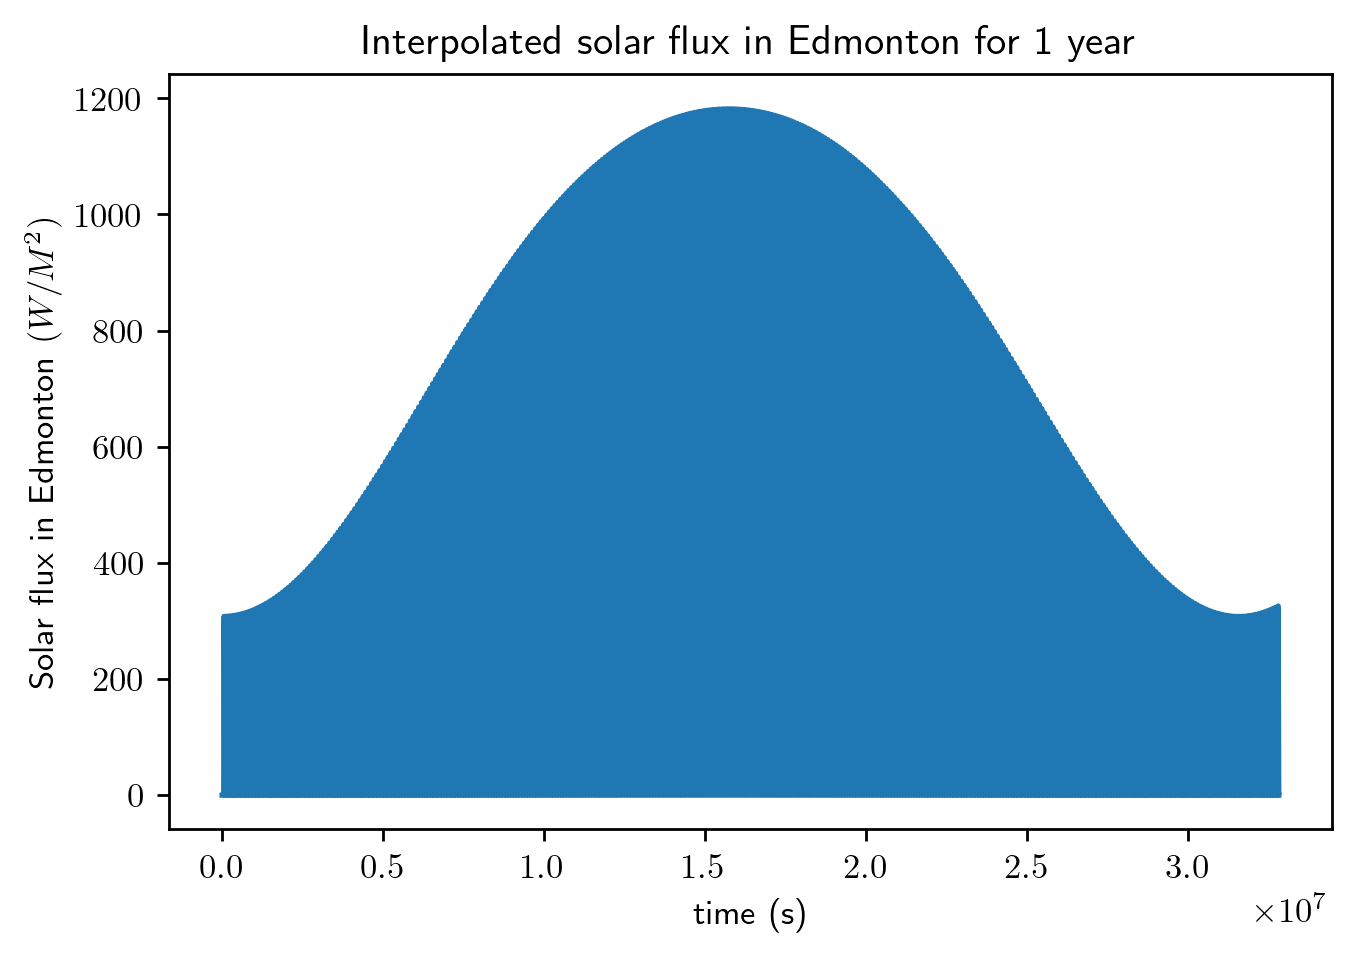

In [11]:
# Interpolated 

from scipy.interpolate import CubicSpline

t=np.linspace(0,380*24*3600,380*48)

flux_vals = []
for i,time in enumerate(t):
    pos_earth_sun = -ephemeris[i, 0:3]
    pos_edmonton = ephemeris[i, 6:9]
    flux_vals.append(flux(pos_earth_sun, pos_edmonton))
    
flux_spline = CubicSpline(t, flux_vals)

plt.plot(t, flux_spline(t))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for 1 year')

Text(0.5, 1.0, 'Interpolated solar flux in Edmonton for a day in June 2019')

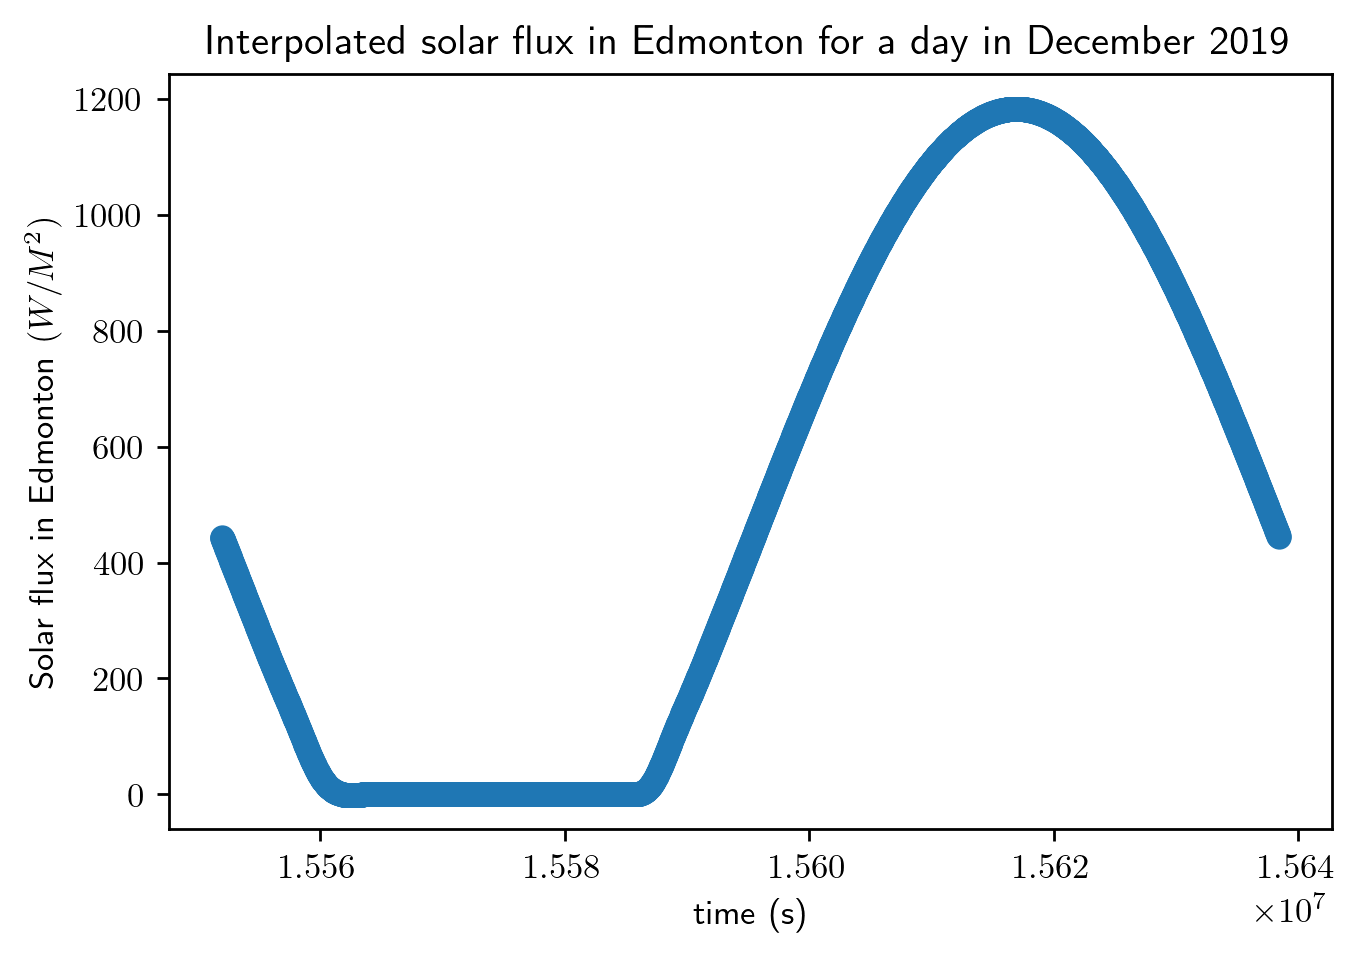

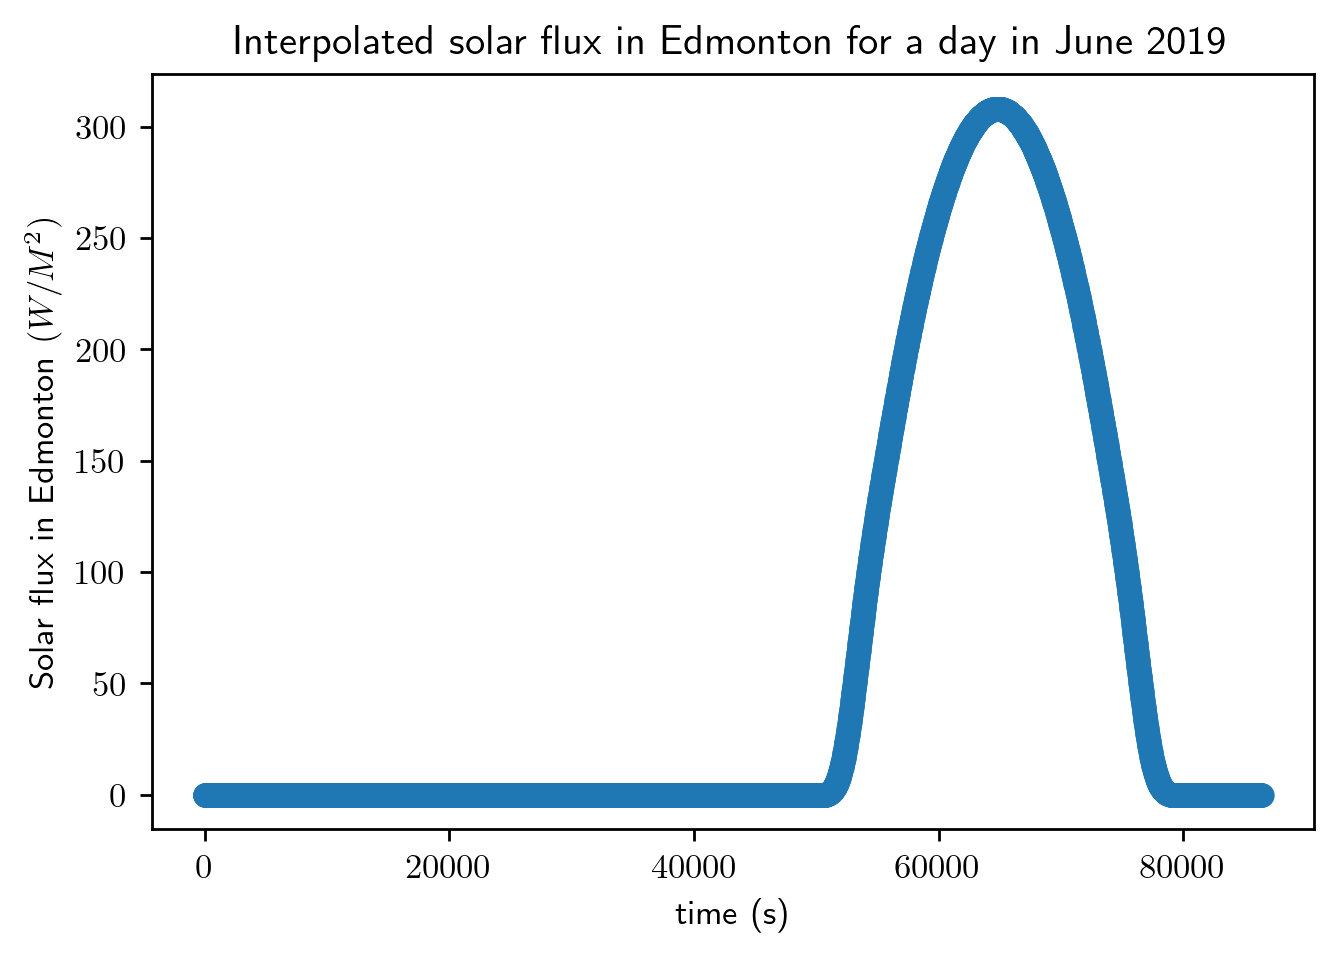

In [12]:
plt.figure()
t_day = np.linspace(180*24*3600, 180*24*3600+24*3600, 24*200)




plt.scatter(t_day, flux_spline(t_day))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for a day in December 2019')
t_day = np.linspace(0, 24*3600, 24*200)
plt.figure()
plt.scatter(t_day, flux_spline(t_day))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for a day in June 2019')




Now write a model that integrates the ordinary differential equation:

\begin{equation} \frac {dT}{dt}=\alpha F(t) - \beta T^4 \end{equation}

using F(t) from the calculation of ephemeris.  

You will need to experiment to find values of $\alpha$ and $\beta$ that are semi-reasonable.  

Find the maximum and minimum temperature for each day from this model, and calculate the difference between this model and the data.

Fit the model to the data.  Plot the residuals.  Comment on the reasonableness of the fit.



In [54]:
from tqdm import tqdm_notebook as tqdm

averageT = df_all_stations['2017-12-22':'2018-12-22'][['minT_mean', 'maxT_mean']].mean(axis=1).values.reshape(366, 1)

averageT_Kelvin = averageT + 273.15

T0 = -17+273.15


def dTdt(T,t):    
    return alpha*flux_spline(t) - beta*T**4

t = np.linspace(0,380*24*3600,366)
good_alpha = []
previous_loss = np.infty
for alpha in tqdm(np.logspace(-9, -6, num=25)):
    for beta in tqdm(np.logspace(-40, -6, num=25)):
        T = odeint(dTdt, T0, t)
        loss = np.linalg.norm(T - averageT_Kelvin)**2
        #print(loss)
        #print((alpha, beta, loss))
        if loss < previous_loss:
            previous_loss = loss
            good_alpha.append((alpha, beta))
            print('New minimum', (alpha, beta, loss))




New minimum (1e-09, 1e-40, 139425.2367496384)
New minimum (1e-09, 2.6101572156825226e-39, 139410.7560407295)
New minimum (1e-09, 6.81292069057965e-38, 139398.66400447718)
New minimum (1e-09, 8.254041852680207e-31, 139361.268989584)
New minimum (1e-09, 1.4677992676220735e-26, 137265.505329686)
New minimum (1e-09, 3.8311868495573087e-25, 137113.43024426093)


KeyboardInterrupt: 

In [46]:
from scipy.optimize import curve_fit

t = np.linspace(0,380*24*3600,366)

def dTdt(T,time):    
    return alpha*flux_spline(time) - beta*T**4


def curvefit(time, alpha, beta):
    def dTdt(T,time):    
        return alpha*flux_spline(time) - beta*T**4
    sol = odeint(dTdt, T0, t)
    return sol.reshape(366)

optimal = curve_fit(curvefit, t, averageT_Kelvin.reshape(366), p0=x0)

In [47]:
print(optimal[0])

[1.09854110e-08 4.94171293e-16]


[1.09854110e-08 4.94171293e-16]
129466.46790198401
129466.46790198401
129466.46790198401


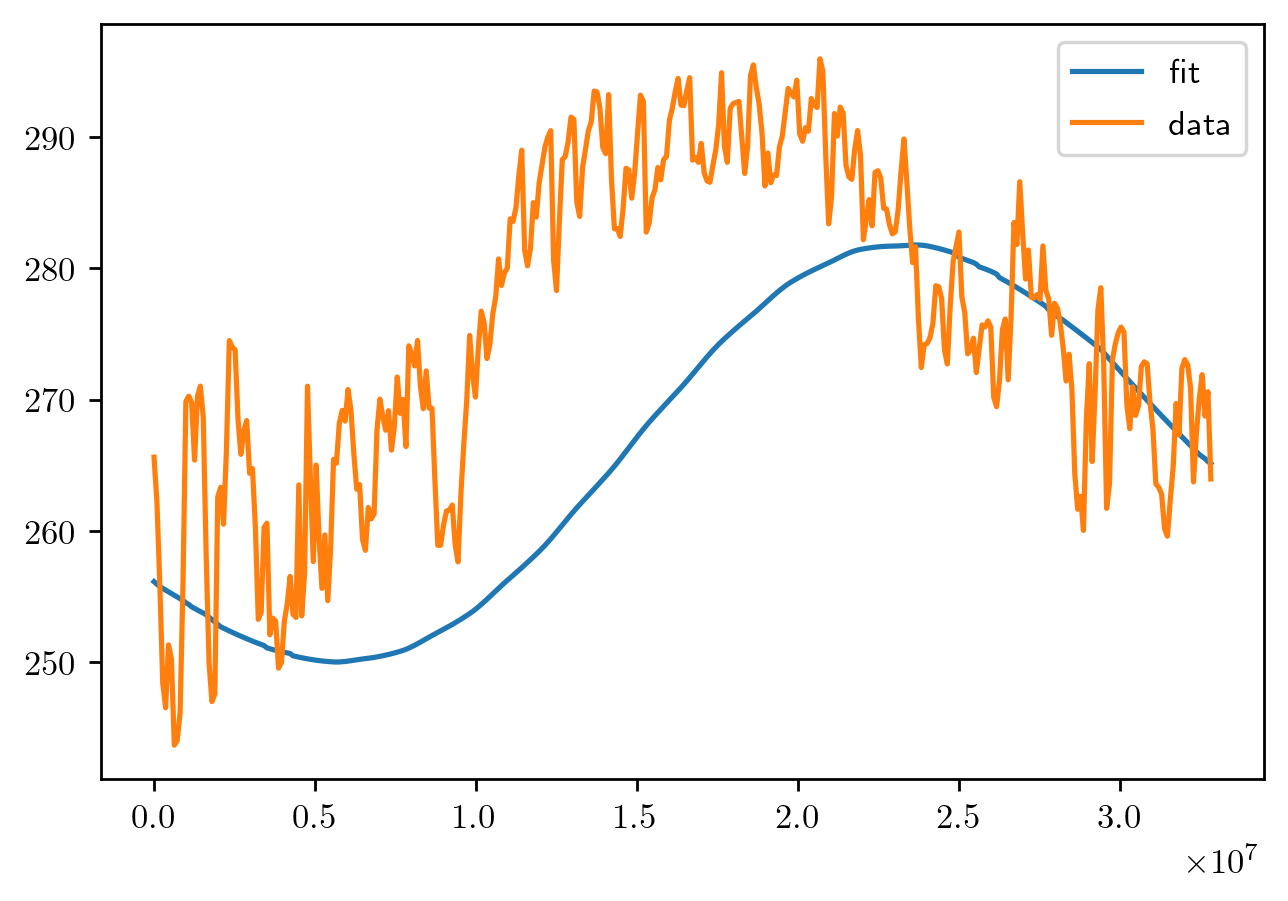

In [53]:
import scipy

from scipy.optimize import minimize

t = np.linspace(0,380*24*3600,366)


def loss(x):
    alpha, beta = x
    t = np.linspace(0,380*24*3600,366)
    T = odeint(dTdt, T0, t)
    print(np.linalg.norm(T - averageT_Kelvin)**2)
    return np.linalg.norm(T - averageT_Kelvin)**2


x0 = np.array([1.0985411419875617e-08, 4.941713361323839e-16])
x0 = optimal[0]
print(x0)
minimize(loss, x0, method='Nelder-Mead')


alpha, beta = np.array([1.0985411419875617e-08, 4.941713361323839e-16])
T = odeint(dTdt, T0, t)
plt.plot(t, T, label='fit')
plt.plot(t, averageT_Kelvin, label='data')
plt.legend()





(Optional) If you would like to experiment some more, we can add some elements to the model and see how the fit improves.  One can add 
feedback("clouds?") by making $\alpha$ and $\beta$ functions (first or second order polynomials) of T. You could also change $T^4$ to $(T-\Delta)^4$- basically saying the cooling infrared radiation doesn't come from the ground, but from higher in the atmosphere where the temperatures are colder.



In [18]:
good_alpha

[(1e-30, 1e-30),
 (6.250551925273976e-21, 1e-30),
 (1.7575106248547965e-18, 1e-30),
 (2.94705170255181e-17, 1e-30),
 (4.941713361323839e-16, 1e-30),
 (8.28642772854686e-15, 1e-30),
 (8.28642772854686e-15, 1.3257113655901109e-24),
 (1.389495494373136e-13, 1e-30),
 (1.389495494373136e-13, 1.676832936811003e-29),
 (1.389495494373136e-13, 2.8117686979742367e-28),
 (1.389495494373136e-13, 7.906043210907734e-26),
 (1.389495494373136e-13, 2.222996482526191e-23),
 (2.3299518105153813e-12, 1e-30),
 (2.3299518105153813e-12, 1.676832936811003e-29),
 (2.3299518105153813e-12, 4.7148663634573896e-27),
 (2.3299518105153813e-12, 7.906043210907734e-26),
 (2.3299518105153813e-12, 1.3257113655901109e-24),
 (2.3299518105153813e-12, 6.250551925273976e-21),
 (3.906939937054621e-11, 1e-30),
 (3.906939937054621e-11, 1.676832936811003e-29),
 (3.906939937054621e-11, 7.906043210907734e-26),
 (6.551285568595495e-10, 1e-30),
 (6.551285568595495e-10, 1.676832936811003e-29),
 (6.551285568595495e-10, 2.81176869797423